In [1]:
# In this notebook:
# Learn hierachical clustering
# Learn dendrogram + heat map for visualization
# Learn agglomerative clustering
# Learn DBSCAN for non-spherical clustering

In [2]:
# code from Python Machine Learning by Raschka / Mirjalili

In [14]:
import matplotlib.pyplot as plt

## Create sample

In [5]:
import numpy as np
import pandas as pd
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0','ID_1', 'ID_2', 'ID_3', 'ID_4']
x = np.random.random_sample([5, 3]) * 10
df = pd.DataFrame(x, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


## Hierarchical clustering

In [6]:
# no need to specify number of clusters upfront 
# more interpretable via dendrograms

In [8]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(
                        df, metric='euclidean')),
                        columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [10]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2',
                                    'distance', '# of items in cluster'],
                           index=['cluster %d' % (i+1) for i in range(
                                  row_clusters.shape[0])])

,row label 1,row label 2,distance,# of items in cluster
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


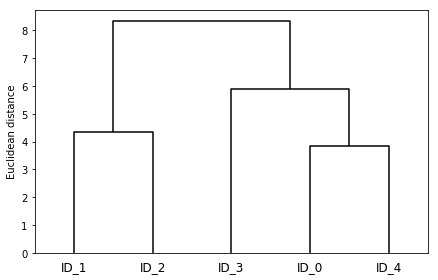

In [16]:
# dendrogram
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import set_link_color_palette
set_link_color_palette(['black'])
row_dendr = dendrogram(row_clusters, labels=labels,
                       color_threshold=np.inf)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

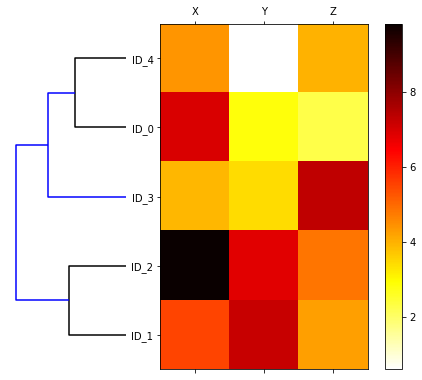

In [26]:
# dendrogram with heat map
# review how to read this best
fig = plt.figure(figsize=(8,8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

## Agglomerative clustering

In [29]:
# allows the choosing of number of clusters
# useful to prune hierarchical cluster tree
# output matches clustering of ID_0 to ID_4
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(x)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


In [31]:
# by reducing # of clusters to 2,
# we see that ID_3 is pruned to fit ID_0 & ID_4 cluster
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(x)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


## DBSCAN

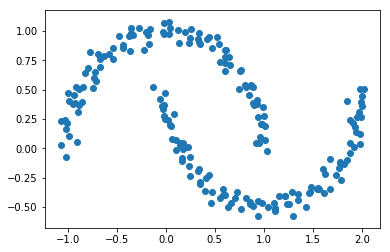

In [34]:
# Stands for density-based spatial clustering for apps with noise
# non-spherical
# can ignore outliers by considering them noise points
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(x[:,0], x[:,1])
plt.show()

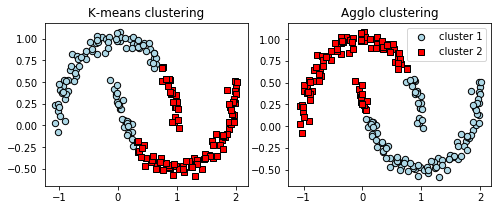

In [52]:
# example of Kmean & agglo not clustering well
from sklearn.cluster import KMeans
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(x)
ax1.scatter(x[y_km == 0,0], x[y_km == 0,1], c='lightblue',
            edgecolor='black', marker='o', s=40, label='cluster 1')
ax1.scatter(x[y_km == 1,0], x[y_km == 1,1], c='red',
            edgecolor='black', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(x)
ax2.scatter(x[y_ac == 0,0], x[y_ac == 0,1], c='lightblue',
            edgecolor='black', marker='o', s=40, label='cluster 1')
ax2.scatter(x[y_ac == 1,0], x[y_ac == 1,1], c='red',
            edgecolor='black', marker='s', s=40, label='cluster 2')
ax2.set_title('Agglo clustering')
plt.legend()
plt.show()

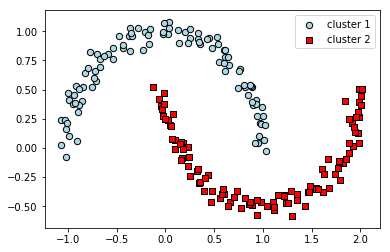

In [51]:
# example of GOOD clustering by DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(x)
plt.scatter(x[y_db == 0,0], x[y_db == 0,1], c='lightblue',
            edgecolor='black', marker='o', s=40, label='cluster 1')
plt.scatter(x[y_db == 1,0], x[y_db == 1,1], c='red',
            edgecolor='black', marker='s', s=40, label='cluster 2')
plt.legend()
plt.show()

In [ ]:
# book mentions graph-based clustering; to research
# book recommends dimension reduction prior to clustering

In [53]:
# this concludes pt 02